In [32]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor 
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor

from sklearn import tree

Using the Adidas sales data for inorder to get three business query:

1. What is the Top selling product?
2. Top Crossing Product?
3. Who are the Top Retailers ?


# Importing data 

In [71]:
import pandas as pd
import io
 
df = pd.read_csv(r"C:\Users\176288724\Downloads\data\Adidas.csv")
df.head()

,Retailer,Retailer ID,Invoice Date,Region,State,City,Product,Price per Unit,Units Sold,Total Sales,Operating Profit,Operating Margin,Sales Method
0,Foot Locker,1185732.0,01/01/2020,Northeast,New York,New York,Men's Street Footwear,$50.00,"1,200",600000.0,300000.0,50%,In-store
1,Foot Locker,1185732.0,02/01/2020,Northeast,New York,New York,Men's Athletic Footwear,$50.00,"1,000",500000.0,150000.0,30%,In-store
2,Foot Locker,1185732.0,03/01/2020,Northeast,New York,New York,Women's Street Footwear,$40.00,"1,000",400000.0,140000.0,35%,In-store
3,Foot Locker,1185732.0,04/01/2020,Northeast,New York,New York,Women's Athletic Footwear,$45.00,850,382500.0,133875.0,35%,In-store
4,Foot Locker,1185732.0,05/01/2020,Northeast,New York,New York,Men's Apparel,$60.00,900,540000.0,162000.0,30%,In-store


# EDA

In [25]:
# shape of dataset
df.shape

(9648, 13)

In [50]:
# info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9648 entries, 0 to 9647
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Retailer          9648 non-null   object
 1   Retailer ID       9648 non-null   int64 
 2   Invoice Date      9648 non-null   object
 3   Region            9648 non-null   object
 4   State             9648 non-null   object
 5   City              9648 non-null   object
 6   Product           9648 non-null   object
 7   Price per Unit    9648 non-null   object
 8   Units Sold        9648 non-null   object
 9   Total Sales       9648 non-null   object
 10  Operating Profit  9648 non-null   object
 11  Operating Margin  9648 non-null   object
 12  Sales Method      9648 non-null   object
dtypes: int64(1), object(12)
memory usage: 980.0+ KB


In [27]:
# count NAN in dataset
df.isna().sum()

Retailer            0
Retailer ID         0
Invoice Date        0
Region              0
State               0
City                0
Product             0
Price per Unit      0
Units Sold          0
Total Sales         0
Operating Profit    0
Operating Margin    0
Sales Method        0
dtype: int64

In [45]:
df.describe() # summary of Data

,Retailer ID
count,9.648000e+03
mean,1.173850e+06
std,2.636038e+04
min,1.128299e+06
25%,1.185732e+06
50%,1.185732e+06
75%,1.185732e+06
max,1.197831e+06


In [66]:
top_selling_products = df.groupby('Product')['Total Sales'].sum().reset_index() #group by products and apply sum function on Total Sales Column
#top_selling_products.index+=1 # the index starts from 0 by default so we plus 1 in index here
top_selling_products

,Product,Total Sales
0,Men's Apparel,123728632.0
1,Men's Athletic Footwear,153673680.0
2,Men's Street Footwear,208826244.0
3,Women's Apparel,179038860.0
4,Women's Athletic Footwear,106631896.0
5,Women's Street Footwear,128002813.0


# graphical interpretation of these values

Text(0.5, 1.0, 'Top Selling Products')

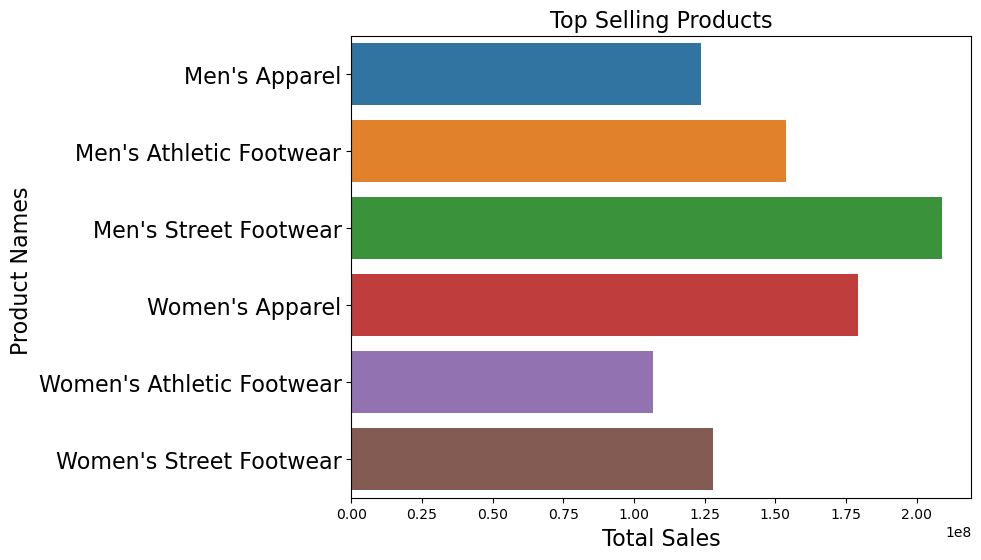

In [67]:
fig , ax = plt.subplots(figsize=(8,6))

sns.barplot(data = top_selling_products,y= 'Product',x ='Total Sales')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 16)

ax.set_xlabel(' Total Sales ', fontsize = 16)
ax.set_ylabel('Product Names ', fontsize = 16)
ax.set_title('Top Selling Products', fontsize = 16)

# Top Grossing Cities

In [72]:
top_grossing = df.groupby('City')['Operating Profit'].sum().sort_values(ascending = False).reset_index().head(10)
top_grossing.index+=1
top_grossing

,City,Operating Profit
1,Charleston,15607205.0
2,New York,13899981.0
3,Miami,12168628.0
4,Portland,10760813.0
5,San Francisco,10256252.0
6,Houston,9845140.0
7,Charlotte,9756425.0
8,Albany,9429864.0
9,New Orleans,9417239.0
10,Birmingham,9147581.0


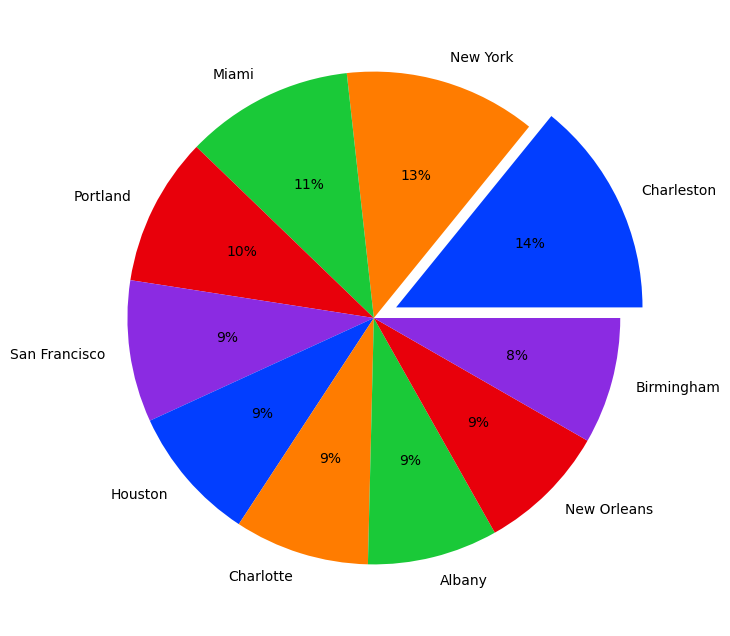

In [73]:
#for pie chart we need 2 lists
data= list(top_grossing['Operating Profit']) #convert Operating Profit series in a list
labels = list(top_grossing['City']) #convert city series in a list
fig , ax = plt.subplots(figsize=(10,8))

colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0,0,0,0,0,0,0,0))
plt.show()


# Who are the Top Retailers?

In [74]:
top_retailors = df.groupby('Retailer')['Operating Profit'].sum().sort_values(ascending=False).reset_index()
top_retailors.index += 1
top_retailors

,Retailer,Operating Profit
1,West Gear,85667968.0
2,Foot Locker,80722234.0
3,Sports Direct,74333022.0
4,Kohl's,36811302.0
5,Amazon,28818533.0
6,Walmart,25782063.0


# Bar Chart of Top Retailers

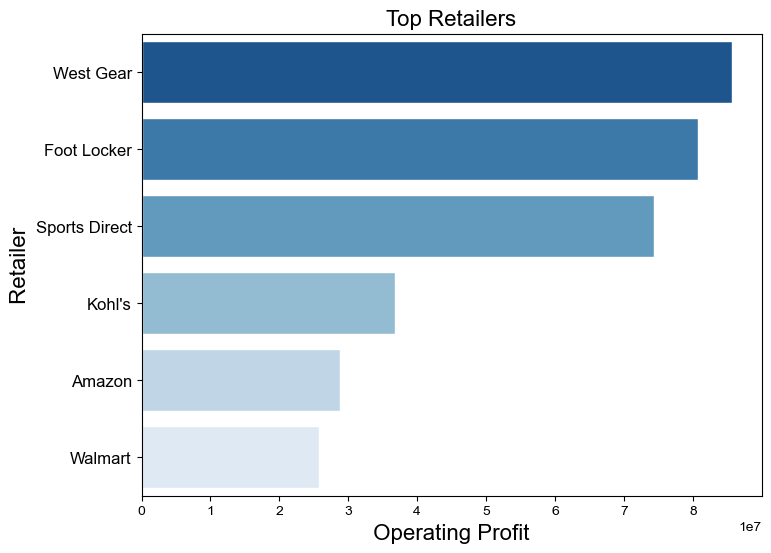

In [75]:
fig , ax = plt.subplots(figsize=(8,6))
sns.set(style='darkgrid')
sns.barplot(data=top_retailors, x='Operating Profit', y='Retailer', palette='Blues_r')
ax.set_yticklabels(ax.get_yticklabels() , fontsize = 12)
ax.set_xlabel(' Operating Profit ', fontsize = 16)
ax.set_ylabel(' Retailer ', fontsize = 16)
ax.set_title('Top Retailers', fontsize = 16)
plt.show()

# Top Selling Methods

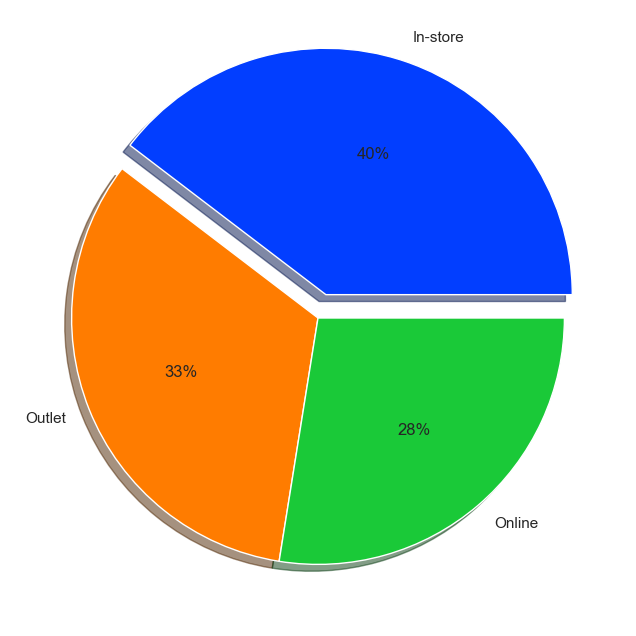

In [76]:
top_methods = df.groupby('Sales Method')['Total Sales'].sum().sort_values(ascending=False).reset_index()
#for pie chart we need 2 lists
data= list(top_methods['Total Sales']) #convert Operating Profit series in a list
labels = list(top_methods['Sales Method'])
fig , ax = plt.subplots(figsize=(10,8))

colors = sns.color_palette('bright')[0:5]
plt.pie(data, labels = labels,colors = colors, autopct='%.0f%%', explode = (0.1, 0,0), shadow =True)
plt.show()